In [12]:
print ("============================================================")
print (" Course Work                              Robiul Islam      ")
print ("============================================================")


import pandas as pd 
from sklearn.utils import shuffle
from itertools import combinations
import bisect
import math
import numpy as np

data = pd.read_csv("/Users/HSE/coursework/github/DL_DemographicStudies/dataset/table_just_one_last_event_binary_month_sequence.csv",sep=";") 

print(data.head(10))






 Course Work                              Robiul Islam      
  gender education type locality religion         how_often generation  \
0      f        general     town      yes        sev_a_year         9g   
1      f   professional     town      yes        sev_a_year        10g   
2      f         higher     town      yes        sev_a_year         3g   
3      m   professional     town      yes             never         9g   
4      f   professional     town      yes  min_once_a_month         3g   
5      m         higher     town      yes             never         7g   
6      m        general     town      yes             never         2g   
7      m         higher     town      yes             never         8g   
8      f        general     town      yes  min_once_a_month         1g   
9      m   professional     town      yes             never         8g   

   partner  marriage  break  divorce    ...      divorce work  \
0        0         1      0        0    ...                

In [30]:
import pandas as pd

# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [13]:
data

,gender,education type,locality,religion,how_often,generation,partner,marriage,break,divorce,...,divorce work,divorce separation from parents,divorce child,education work,education separation from parents,education child,work separation from parents,work child,separation from parents child,last_ev
0,f,general,town,yes,sev_a_year,9g,0,1,0,0,...,n,>,>,<,>,<,>,>,<,work
1,f,professional,town,yes,sev_a_year,10g,0,1,0,0,...,>,>,>,>,>,>,<,<,<,education
2,f,higher,town,yes,sev_a_year,3g,0,1,0,0,...,>,>,n,>,>,<,<,<,<,child
3,m,professional,town,yes,never,9g,1,0,0,0,...,>,>,>,<,<,<,>,<,<,br
4,f,professional,town,yes,min_once_a_month,3g,0,1,0,0,...,>,>,n,=,<,<,<,<,<,child
5,m,higher,town,yes,never,7g,0,1,0,0,...,>,>,n,<,>,<,>,<,<,child
6,m,general,town,yes,never,2g,0,1,0,0,...,>,>,n,=,<,<,<,<,<,child
7,m,higher,town,yes,never,8g,1,1,1,0,...,>,>,>,>,>,>,>,<,<,div
8,f,general,town,yes,min_once_a_month,1g,0,1,0,0,...,>,>,n,<,<,<,<,<,<,child
9,m,professional,town,yes,never,8g,0,1,0,0,...,>,>,n,<,<,<,<,<,<,child


In [16]:
data.last_ev.value_counts()

child        1766
education     760
sep           682
br            562
div           473
work          330
marriage      251
partner       241
Name: last_ev, dtype: int64

In [49]:
y = data["last_ev"].map({"child":0, "education":1,"sep":2,"br":3,"div":4,"work":5,"marriage":6,"partner":7})
X = data.drop(["last_ev","partner.1","marriage.1","break.1","divorce.1","child.1","sep_from_par.1","work.1","education.1"], axis=1)

In [51]:
X.dtypes,X.isnull().values.any()

(gender                               object
 education type                       object
 locality                             object
 religion                             object
 how_often                            object
 generation                           object
 partner                               int64
 marriage                              int64
 break                                 int64
 divorce                               int64
 child                                 int64
 sep_from_par                          int64
 work                                  int64
 education                             int64
 partner marriage                     object
 partner break                        object
 partner divorce                      object
 partner education                    object
 partner work                         object
 partner separation from parents      object
 partner child                        object
 marriage break                       object
 marriage 

In [53]:
data["marriage"]

0       1
1       1
2       1
3       0
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      0
15      1
16      0
17      0
18      0
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
5035    0
5036    1
5037    1
5038    1
5039    0
5040    0
5041    1
5042    1
5043    1
5044    1
5045    1
5046    0
5047    0
5048    0
5049    1
5050    0
5051    1
5052    0
5053    1
5054    1
5055    1
5056    1
5057    0
5058    1
5059    0
5060    1
5061    1
5062    1
5063    1
5064    1
Name: marriage, Length: 5065, dtype: int64

In [54]:
num_features = ["partner", "marriage", "break", "divorce", "child", 
                "sep_from_par", "work","education"]

cat_features = ["gender",
"education type"          ,
"locality"         ,
"religion"        ,
"how_often"       ,
"generation"       ,
"partner marriage"      ,
"partner break"       ,
"partner divorce"      ,
"partner education"     ,
"partner work"    ,
"partner separation from parents"   ,
"partner child"  ,
"marriage break"        ,
"marriage divorce"       ,
"marriage education"       ,
"marriage work"      ,
"marriage separation from parents"     ,
"marriage child"     ,
"break divorce"    ,
"break education"   ,
"break work"      ,
"break separation from parents"  ,
"break child"     ,
"divorce education"     ,
"divorce work"     ,
"divorce separation from parents"    ,
"divorce child"    ,
"education work"    ,
"education separation from parents"   ,
"education child"  ,
"work separation from parents"  ,
"work child"  ,
"separation from parents child"]

In [55]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

In [47]:
X.isnull().values.any(),X.isnull().sum()

(True, gender                                  0
 education type                          0
 locality                                0
 religion                                0
 how_often                               0
 generation                              0
 partner                                 0
 marriage                                0
 break                                   0
 divorce                                 0
 child                                   0
 sep_from_par                            0
 work                                    0
 education                               0
 partner.1                            3357
 marriage.1                            974
 break.1                              4717
 divorce.1                            4551
 child.1                              2304
 sep_from_par.1                        886
 work.1                                410
 education.1                           802
 partner marriage                        0
 part

In [56]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

In [58]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__C': [1, 1.3, 1.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [59]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.5}
0.8569816643159379


In [60]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [61]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEncoder(categorical_features=None, categories=None,
          dtype=<class 'numpy.float64'>, handle_unknown='ignore',
          n_values=None, sparse... 'education child', 'work separation from parents', 'work child', 'separation from parents child'])])),
  ('model', LogisticRegression(C=1.5, class_weight='balanced', dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
             solver='liblinear', tol=0.0001, verbose=0, warm_start=False))],
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=Non

In [62]:
lr_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [63]:
y_pred = lr_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8618421052631579

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       530
           1       0.99      0.95      0.97       228
           2       0.87      0.95      0.91       205
           3       0.79      0.86      0.82       169
           4       0.79      0.68      0.73       142
           5       0.84      0.97      0.90        99
           6       0.49      0.64      0.55        75
           7       0.72      0.46      0.56        72

   micro avg       0.86      0.86      0.86      1520
   macro avg       0.80      0.80      0.80      1520
weighted avg       0.87      0.86      0.86      1520



In [66]:
import eli5
eli5.show_weights(lr_model.named_steps["model"])

In [67]:
preprocessor = lr_model.named_steps["preprocessor"]

In [68]:
ohe_categories = preprocessor.named_transformers_["categorical"].categories_

In [69]:
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

In [70]:
all_features = num_features + new_ohe_features

In [71]:
pd.DataFrame(lr_model.named_steps["preprocessor"].transform(X_train), columns=all_features).head()

,partner,marriage,break,divorce,child,sep_from_par,work,education,gender__f,gender__m,...,work separation from parents__>,work separation from parents__n,work child__<,work child__=,work child__>,work child__n,separation from parents child__<,separation from parents child__=,separation from parents child__>,separation from parents child__n
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=all_features)

In [73]:
i = 4
X_test.iloc[[i]]

,gender,education type,locality,religion,how_often,generation,partner,marriage,break,divorce,...,divorce education,divorce work,divorce separation from parents,divorce child,education work,education separation from parents,education child,work separation from parents,work child,separation from parents child
4087,m,professional,city,yes,sev_a_year,10g,0,1,0,0,...,>,>,>,n,<,<,<,<,<,<


In [74]:
y_test.iloc[i]

0

In [75]:
eli5.show_prediction(lr_model.named_steps["model"], 
                     lr_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [76]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [3, 5, 7], 'model__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 7, 'model__min_samples_split': 5}
0.8225669957686883


In [78]:
dt_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [79]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.8243421052631579

In [81]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       530
           1       0.98      0.92      0.95       228
           2       0.83      0.93      0.88       205
           3       0.76      0.80      0.78       169
           4       0.79      0.73      0.75       142
           5       0.82      0.90      0.86        99
           6       0.38      0.80      0.52        75
           7       0.72      0.46      0.56        72

   micro avg       0.82      0.82      0.82      1520
   macro avg       0.78      0.79      0.77      1520
weighted avg       0.85      0.82      0.83      1520



In [82]:
eli5.show_weights(dt_model.named_steps["model"], feature_names=all_features)

Weight,Feature
0.1821,education
0.1764,work
0.1500,sep_from_par
0.1378,divorce child__n
0.1079,marriage
0.0980,partner break__<
0.0417,break divorce__>
0.0340,break divorce__<
0.0139,marriage break__n
0.0087,partner divorce__n


In [83]:
eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

In [84]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...ators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [10, 15], 'model__min_samples_split': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.8471086036671368


In [86]:
rf_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...ators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

In [87]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.8592105263157894

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       530
           1       0.97      0.94      0.96       228
           2       0.86      0.90      0.88       205
           3       0.79      0.81      0.80       169
           4       0.79      0.73      0.75       142
           5       0.82      0.95      0.88        99
           6       0.50      0.71      0.59        75
           7       0.90      0.49      0.63        72

   micro avg       0.86      0.86      0.86      1520
   macro avg       0.82      0.80      0.80      1520
weighted avg       0.87      0.86      0.86      1520



In [90]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=all_features)

Weight,Feature
0.0288 ± 0.1019,break education__>
0.0281 ± 0.0994,education
0.0270 ± 0.1010,divorce work__>
0.0264 ± 0.0868,break separation from parents__n
0.0263 ± 0.0838,sep_from_par
0.0259 ± 0.0965,work
0.0257 ± 0.0850,break separation from parents__>
0.0256 ± 0.0906,divorce education__>
0.0253 ± 0.0997,break work__>
0.0246 ± 0.0906,divorce work__n


In [91]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco..._lambda=1,
       scale_pos_weight=-1.081934846989141, seed=None, silent=True,
       subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [5, 10], 'model__min_child_weight': [5, 10], 'model__n_estimators': [25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [92]:
print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 5, 'model__min_child_weight': 10, 'model__n_estimators': 25}
0.8758815232722144


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['partner', 'marriage', 'break', 'divorce', 'child', 'sep_from_par', 'work', 'education']), ('categorical', OneHotEnco...=0, reg_lambda=1, scale_pos_weight=-1.081934846989141,
       seed=None, silent=True, subsample=1))])

In [93]:
y_pred = xgb_model.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred)

0.8743421052631579

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       530
           1       0.99      0.95      0.97       228
           2       0.89      0.92      0.90       205
           3       0.78      0.85      0.81       169
           4       0.80      0.73      0.76       142
           5       0.83      0.98      0.90        99
           6       0.70      0.49      0.58        75
           7       1.00      0.40      0.57        72

   micro avg       0.87      0.87      0.87      1520
   macro avg       0.86      0.79      0.80      1520
weighted avg       0.88      0.87      0.87      1520



In [96]:
from lime.lime_tabular import LimeTabularExplainer

In [97]:
categorical_names = {}
for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col.split("__")[1] 
                                                       for new_col in new_ohe_features 
                                                       if new_col.split("__")[0] == col]

In [98]:
categorical_names

{0: ['f', 'm'],
 1: ['general', 'higher', 'professional'],
 2: ['city', 'town', 'village'],
 3: ['no', 'yes'],
 4: ['min_once_a_month', 'never', 'once_a_week', 'sev_a_week', 'sev_a_year'],
 5: ['10g', '11g', '1g', '2g', '3g', '4g', '5g', '6g', '7g', '8g', '9g'],
 14: ['<', '>', 'n'],
 15: ['<', 'n'],
 16: ['<', '=', '>', 'n'],
 17: ['<', '=', '>', 'n'],
 18: ['<', '=', '>', 'n'],
 19: ['<', '=', '>', 'n'],
 20: ['<', '=', '>', 'n'],
 21: ['<', '>', 'n'],
 22: ['<', 'n'],
 23: ['<', '=', '>', 'n'],
 24: ['<', '=', '>', 'n'],
 25: ['<', '=', '>', 'n'],
 26: ['<', '=', '>', 'n'],
 27: ['<', '=', '>', 'n'],
 28: ['<', '=', '>', 'n'],
 29: ['<', '=', '>', 'n'],
 30: ['<', '>', 'n'],
 31: ['<', '=', '>', 'n'],
 32: ['<', '>', 'n'],
 33: ['<', '>', 'n'],
 34: ['<', '=', '>', 'n'],
 35: ['<', '=', '>', 'n'],
 36: ['<', '=', '>', 'n'],
 37: ['<', '=', '>', 'n'],
 38: ['<', '=', '>', 'n'],
 39: ['<', '=', '>', 'n'],
 40: ['<', '=', '>', 'n'],
 41: ['<', '=', '>', 'n']}

In [102]:
from helpers import convert_to_lime_format

ImportError: cannot import name 'convert_to_lime_format' from 'helpers' (/anaconda3/lib/python3.7/site-packages/helpers/__init__.py)

In [103]:
explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 categorical_names=categorical_names,
                                 categorical_features=categorical_names.keys(),
                                 discretize_continuous=True,
                                 random_state=42)

NameError: name 'convert_to_lime_format' is not defined

In [104]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [105]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [106]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

In [110]:
i = 0
shap.force_plot(explainer.expected_value, shap_values=shap_values[i], 
                features=observations[i], feature_names=all_features)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [111]:
shap.force_plot?

In [114]:
shap.force_plot(explainer.expected_value, shap_values[0],
                features=observations, feature_names=all_features,plot_cmap="RdBu", matplotlib=False)


Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

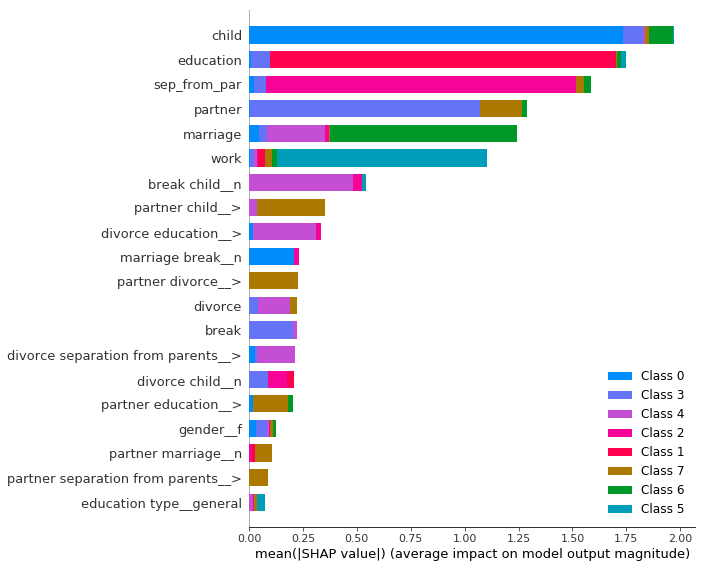

In [115]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

In [116]:
shap.dependence_plot("child", shap_values, 
                     pd.DataFrame(observations, columns=all_features))

AttributeError: 'list' object has no attribute 'shape'

In [120]:
shap.force_plot(explainer.expected_value[0], shap_values, X)

AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

In [119]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

In [121]:
shap.dependence_plot("child", shap_values, X)

AttributeError: 'list' object has no attribute 'shape'

IndexError: index 53 is out of bounds for axis 0 with size 42

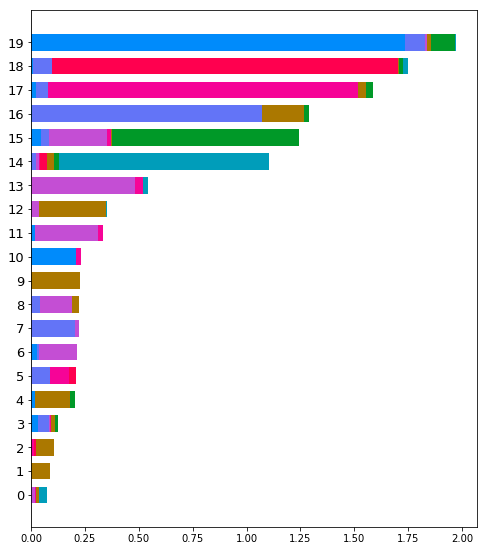

In [122]:
shap.summary_plot(shap_values, X)

IndexError: index 53 is out of bounds for axis 0 with size 42

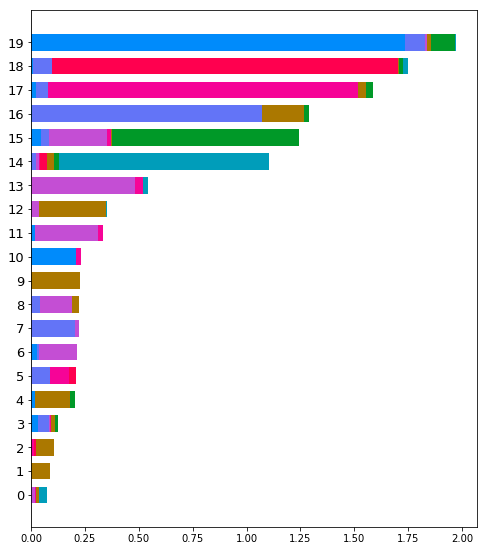

In [123]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [126]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

ValueError: could not convert string to float: '<'

In [137]:
# This model training code is directly from:
# https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py

'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
#x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
#x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features,42 ))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(8, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
4052 train sequences
1013 test sequences
Pad sequences (samples x time)
x_train shape: (4052, 42)
x_test shape: (1013, 42)
Build model...
Train...


ValueError: Error when checking target: expected dense_2 to have shape (8,) but got array with shape (1,)

In [136]:
X.count(axis = 0) 

gender                               5065
education type                       5065
locality                             5065
religion                             5065
how_often                            5065
generation                           5065
partner                              5065
marriage                             5065
break                                5065
divorce                              5065
child                                5065
sep_from_par                         5065
work                                 5065
education                            5065
partner marriage                     5065
partner break                        5065
partner divorce                      5065
partner education                    5065
partner work                         5065
partner separation from parents      5065
partner child                        5065
marriage break                       5065
marriage divorce                     5065
marriage education                

In [141]:
import numpy
import pandas
import random
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [142]:

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=42, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=random.randint(1, 100), verbose=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=random.randint(1, 100))
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'f'

In [143]:
X

,gender,education type,locality,religion,how_often,generation,partner,marriage,break,divorce,...,divorce education,divorce work,divorce separation from parents,divorce child,education work,education separation from parents,education child,work separation from parents,work child,separation from parents child
0,f,general,town,yes,sev_a_year,9g,0,1,0,0,...,>,n,>,>,<,>,<,>,>,<
1,f,professional,town,yes,sev_a_year,10g,0,1,0,0,...,n,>,>,>,>,>,>,<,<,<
2,f,higher,town,yes,sev_a_year,3g,0,1,0,0,...,>,>,>,n,>,>,<,<,<,<
3,m,professional,town,yes,never,9g,1,0,0,0,...,>,>,>,>,<,<,<,>,<,<
4,f,professional,town,yes,min_once_a_month,3g,0,1,0,0,...,>,>,>,n,=,<,<,<,<,<
5,m,higher,town,yes,never,7g,0,1,0,0,...,>,>,>,n,<,>,<,>,<,<
6,m,general,town,yes,never,2g,0,1,0,0,...,>,>,>,n,=,<,<,<,<,<
7,m,higher,town,yes,never,8g,1,1,1,0,...,>,>,>,>,>,>,>,>,<,<
8,f,general,town,yes,min_once_a_month,1g,0,1,0,0,...,>,>,>,n,<,<,<,<,<,<
9,m,professional,town,yes,never,8g,0,1,0,0,...,>,>,>,n,<,<,<,<,<,<
